In [164]:
from IPython.display import HTML

In [165]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Identify Fraud From Enron Email
### Project Overview

#### Goal
Using machine learning skills to build an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

In [3]:
import sys
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

sys.path.append("./tools/")
import tester
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [66]:
#Load the disctionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

## Task 1 Explore the dataset
#### Overview of the dataset

In [6]:
def exploration_data(data_dict):
    total_people = len(data_dict)
    print "total number of people in the dataset: ", total_people
    
    number_features = len(data_dict["ALLEN PHILLIP K"])
    total_features = data_dict["ALLEN PHILLIP K"].keys()
    print "Total features in the dataset: "
    print total_features
    print "poi is the label, the number of all other featuers in the dataset is: ", number_features-1
    print "An example entry 'ALLEN PHILLIP K' in the dataset: "
    print data_dict["ALLEN PHILLIP K"]
    
    #check for the poi
    total_poi = 0
    for k in data_dict:
        if data_dict[k]["poi"] == True:
            total_poi+=1
    print "The number of poi:", total_poi
    print "The percentage of poi is {:0.2f}%.".format(100.00*total_poi/total_people)
    
exploration_data(data_dict)

total number of people in the dataset:  146
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

## Task 2 Remove outliers
#### Outliers

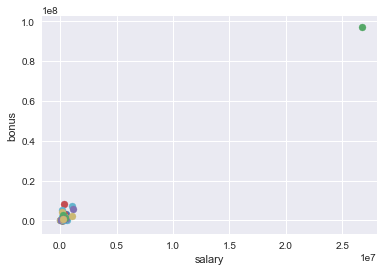

In [67]:
#check for outliers in dataset and remove these outliers

def plot_data(data_dict,f1,f2):
    features = [f1,f2]
    data = featureFormat(data_dict,features)
    
    #data visulization
    for point in data:
        arr1 = point[0]
        arr2 = point[1]
        plt.scatter(arr1,arr2)
    
    plt.xlabel(f1)
    plt.ylabel(f2)
    
    plt.show()
       
plot_data(data_dict,"salary","bonus")

**After visualizating the "Salary" and "Bonus", one huge number popped out. Checked the keys of the dataset, I found one key "Total" with big number of "salary" and "bonus", is the sum of all other person.This is an outlier.  **
  
**Remove this outlier "Total"**

In [68]:
#Check the keys and the outlier could be the total key
#Total is the sum of all salary and bonus
#pop will change the dictonary
data_dict.pop("TOTAL",0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

**Plot the dataset after outlier removal, although there are four other big numbers in the plot, there is no extreme plot left.**

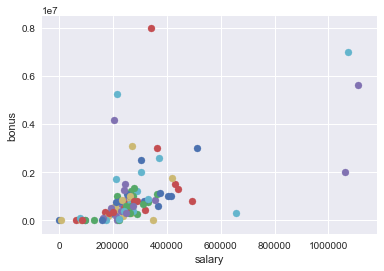

In [69]:
#check the dataset after outlier removal
plot_data(data_dict,"salary","bonus")

**Explore keys further to check if there are other unapproporate data points in dataset **

In [70]:
#explore other keys
keys = []
for k in data_dict:
    keys.append(k)

pprint.pprint(sorted(keys))


['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

**Easily find "THE TRAVEL AGENCY IN THE PARK" is not a name  
Remove this confusing key**

In [71]:
#remove outlier
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

#### Check the dataset after outliers removal

In [72]:
#check the dataset after outliers removal
exploration_data(data_dict)

total number of people in the dataset:  144
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

## Task 3 Create new features
#### Among these features, "email_address" is the feature related to people's name, so I excluded it from dataset.
#### The email communication from/to POI is directly pointing to POIs, which should be the important features, so I created two new features "from_poi_to_this_person_ratio" and "from_this_person_to_poi_ratio" based on these features
**In which:  
from_poi_to_this_person_ratio = from_poi_to_this_person/to_message  
from_this_person_to_poi_ratio = from_this_person_to_poi/from_message** 

In [73]:
#feature engineering
#remove feature "email_address"
#create new features "from_poi_to_this_person_ratio" and "from_this_person_to_poi_ratio"
for f in data_dict:
    if data_dict[f]["from_poi_to_this_person"]!="NaN":
        data_dict[f]["from_poi_to_this_person_ratio"] = 1.0 * data_dict[f]["from_poi_to_this_person"]/data_dict[f]["to_messages"]
    else:
        data_dict[f]["from_poi_to_this_person_ratio"] = "NaN"
        
for f in data_dict:
    if data_dict[f]["from_this_person_to_poi"]!="NaN":
        data_dict[f]["from_this_person_to_poi_ratio"] = 1.0 * data_dict[f]["from_this_person_to_poi"]/data_dict[f]["from_messages"]
    else:
        data_dict[f]["from_this_person_to_poi_ratio"] = "NaN"   
        

In [74]:
#make the featurs_list
features_list  = ['poi','total_payments','total_stock_value',
                  'salary', 'deferral_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
                  'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                  'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi','from_poi_to_this_person_ratio','from_this_person_to_poi_ratio']

## Task 4 Impute missing and incorrect values
#### To explore the dataset further, I transformed the dictionary into a dataframe

In [75]:
###df
df = pd.DataFrame.from_dict(data_dict,orient="index")
df = df.replace("NaN",np.nan)
df = df[features_list]
print "This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])
df.head()

This dataset has 144 rows and 22 columns


,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,NaN,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,NaN,2902.0,47.0,2195.0,65.0,1407.0,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,NaN,178980.0,NaN,NaN,NaN,NaN,3486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,NaN,NaN,NaN,-560222.0,-5104.0,56301.0,...,NaN,1757552.0,NaN,566.0,39.0,29.0,0.0,465.0,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,NaN,1200000.0,NaN,-1386055.0,11200.0,...,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,NaN,400000.0,-82782.0,-201641.0,129142.0,...,NaN,145796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checked the null value among the dataset  
Caculated the total null values within each feature**

In [76]:
#impute missing values
df.isnull().sum()

poi                                0
total_payments                    21
total_stock_value                 19
salary                            50
deferral_payments                106
loan_advances                    141
bonus                             63
restricted_stock_deferred        127
deferred_income                   96
expenses                          50
exercised_stock_options           43
other                             53
long_term_incentive               79
restricted_stock                  35
director_fees                    128
to_messages                       58
from_poi_to_this_person           58
from_messages                     58
from_this_person_to_poi           58
shared_receipt_with_poi           58
from_poi_to_this_person_ratio     58
from_this_person_to_poi_ratio     58
dtype: int64

In [18]:
#drop columns with more than 120 missing data points
#cols = ['loan_advances','restricted_stock_deferred','director_fees']
#df.drop(cols,axis = 1, inplace=True)

In [23]:
df.head()

,poi,total_payments,total_stock_value,salary,deferral_payments,bonus,deferred_income,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,4175000.0,-3081055.0,13868.0,1729541.0,152.0,304805.0,126027.0,2902.0,47.0,2195.0,65.0,1407.0,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,NaN,178980.0,NaN,NaN,3486.0,257817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,NaN,NaN,-5104.0,56301.0,4046157.0,864523.0,NaN,1757552.0,566.0,39.0,29.0,0.0,465.0,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,1200000.0,-1386055.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,400000.0,-201641.0,129142.0,NaN,69.0,NaN,145796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fillfulled these null values within financial features by 0  
Fillfulled these null values within contact features by the mean **

In [77]:
#impute null financial features by 0
df.loc[:,"total_payments":"director_fees"] = df.loc[:,"total_payments":"director_fees"].fillna(0)

#impute null contact features by the mean
df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].apply(lambda x: x.fillna(x.mean()),axis = 0)

#df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].fillna(0)

**Check the dataset again after null imputation **

In [78]:
#Check to see all null values are corrected
df.isnull().sum()

poi                              0
total_payments                   0
total_stock_value                0
salary                           0
deferral_payments                0
loan_advances                    0
bonus                            0
restricted_stock_deferred        0
deferred_income                  0
expenses                         0
exercised_stock_options          0
other                            0
long_term_incentive              0
restricted_stock                 0
director_fees                    0
to_messages                      0
from_poi_to_this_person          0
from_messages                    0
from_this_person_to_poi          0
shared_receipt_with_poi          0
from_poi_to_this_person_ratio    0
from_this_person_to_poi_ratio    0
dtype: int64

### Check if the "total_payments" and "total_stock_value" are correct
**Find two data points "BELFER ROBERT" and "BHATNAGAR SANJAY" have problem in "total_payments"**  
**Correct thess two datapoints**

In [79]:
#Check the "total_payments" 
payments = ["salary","deferral_payments","loan_advances","bonus","deferred_income",
            "expenses","other","director_fees","long_term_incentive"]
df[df[payments].sum(axis = "columns")!=df.total_payments] 

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
BELFER ROBERT,False,102500.0,-44093.0,0.0,-102500.0,0.0,0.0,44093.0,0.0,0.0,...,0.0,0.0,3285.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BHATNAGAR SANJAY,False,15456290.0,0.0,0.0,0.0,0.0,0.0,15456290.0,0.0,0.0,...,0.0,-2604490.0,137864.0,523.000000,0.000000,29.000000,1.000000,463.000000,0.000000,0.034483


In [80]:
#Correct total_payments
df["total_payments"]["BELFER ROBERT"] = df[payments].loc["BELFER ROBERT"].sum()
df["total_payments"]["BHATNAGAR SANJAY"] = df[payments].loc["BHATNAGAR SANJAY"].sum()

In [81]:
#Make sure all incorrect total_payments are properly corrected
df[df[payments].sum(axis = "columns")!=df.total_payments] 

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio


In [82]:
#Check the "total_stock_value"
stock_value = ["restricted_stock_deferred","exercised_stock_options","restricted_stock"]
df[df[stock_value].sum(axis = "columns") !=df.total_stock_value]

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
BELFER ROBERT,False,-99215.0,-44093.0,0.0,-102500.0,0.0,0.0,44093.0,0.0,0.0,...,0.0,0.0,3285.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BHATNAGAR SANJAY,False,275728.0,0.0,0.0,0.0,0.0,0.0,15456290.0,0.0,0.0,...,0.0,-2604490.0,137864.0,523.000000,0.000000,29.000000,1.000000,463.000000,0.000000,0.034483


In [83]:
#Correct total_stock_value
df["total_stock_value"]["BELFER ROBERT"] = df[stock_value].loc["BELFER ROBERT"].sum()
df["total_stock_value"]["BHATNAGAR SANJAY"] = df[stock_value].loc["BHATNAGAR SANJAY"].sum()

In [84]:
#Make sure all incorrect total_stock_value are properly corrected
df[df[stock_value].sum(axis = "columns")!=df.total_stock_value] 

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio


**Check the first 5 rows of the dataset**

In [85]:
df.head()

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,0.0,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,0.0,2902.000000,47.000000,2195.000000,65.000000,1407.000000,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,0.0,178980.0,0.0,0.0,0.0,0.0,3486.0,...,0.0,0.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,0.0,0.0,0.0,-560222.0,-5104.0,56301.0,...,0.0,1757552.0,0.0,566.000000,39.000000,29.000000,0.000000,465.000000,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,0.0,1200000.0,0.0,-1386055.0,11200.0,...,1586055.0,3942714.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,0.0,400000.0,-82782.0,-201641.0,129142.0,...,0.0,145796.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055


In [86]:
#Store to my_dataset for easy export below
my_dataset = df.to_dict(orient = "index")
feature_list_new = list(df.columns.values)
print "There are {} people and {} features in this dataset".format(len(my_dataset),len(feature_list_new))

There are 144 people and 22 features in this dataset


In [87]:
#extract features and labels from dataset for testing
data = featureFormat(my_dataset,feature_list_new,sort_keys=True)
labels,features = targetFeatureSplit(data)

## Task 5 Feature selection
**Select features using random forest**

In [93]:
#select features using random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
tester.test_classifier(clf, my_dataset,feature_list_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
	Accuracy: 0.85927	Precision: 0.41005	Recall: 0.12650	F1: 0.19335	F2: 0.14680
	Total predictions: 15000	True positives:  253	False positives:  364	False negatives: 1747	True negatives: 12636



**List the feature importance**

In [94]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [95]:
features_list = sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), 
                           feature_list_new[1:]), reverse=True)

features_df = pd.DataFrame(features_list)
features_df = features_df.rename(index = str, columns = {0:"importance",1:"feature"})

In [96]:
features_df

,importance,feature
0,0.1533,other
1,0.1422,from_this_person_to_poi_ratio
2,0.1299,exercised_stock_options
3,0.0954,expenses
4,0.0736,salary
5,0.0620,restricted_stock
6,0.0533,long_term_incentive
7,0.0467,total_payments
8,0.0426,bonus
9,0.0401,to_messages


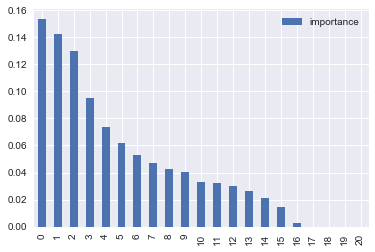

In [97]:
features_df.plot(kind = 'bar')

#### Selected final features based on importance   
In which  
The selected_featuers1 has 'other','from_this_person_to_poi_ratio','exercised_stock_options'and 'expenses', based on threshold of **0.08**  
The selected_features3 has all features in selected_features1 plus 'salary' and 'restricted_stock', based on threshold of **0.06**  
The selected_features2 is in between selected_features1 and selected_features2  
These three sets of features are tested afterward 

One of these new features **'from_this_person_to_poi_ratio'** is the second important feature.

In [129]:
#the threshold of accuracy is 0.08 and 0.06
selected_features1 = ['poi','other','from_this_person_to_poi_ratio','exercised_stock_options','expenses']

selected_features3 = ['poi','other','from_this_person_to_poi_ratio','exercised_stock_options','expenses',
                     'salary','restricted_stock']

selected_features2 = ['poi','other','from_this_person_to_poi_ratio','exercised_stock_options','expenses',
                     'salary']

## Task 6 Try different classifiers  
**Naive Bayes, Decision Trees and Random Forest are used for this task. These classifiers do not require feature scaling since these algorithms do not calculate Euclidean distance.** 
**There is no standardization or normalization on dataset.**

In [34]:
#Try a variaty of classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [130]:
#gaussian navie bays using 4 features,5 features and 6 features
nb = GaussianNB()
for i in [selected_features1,selected_features2,selected_features3]:
    tester.test_classifier(nb, my_dataset,i)

GaussianNB(priors=None)
	Accuracy: 0.85847	Precision: 0.42890	Recall: 0.18550	F1: 0.25899	F2: 0.20925
	Total predictions: 15000	True positives:  371	False positives:  494	False negatives: 1629	True negatives: 12506

GaussianNB(priors=None)
	Accuracy: 0.85733	Precision: 0.41686	Recall: 0.17550	F1: 0.24701	F2: 0.19848
	Total predictions: 15000	True positives:  351	False positives:  491	False negatives: 1649	True negatives: 12509

GaussianNB(priors=None)
	Accuracy: 0.85393	Precision: 0.40265	Recall: 0.19750	F1: 0.26501	F2: 0.21991
	Total predictions: 15000	True positives:  395	False positives:  586	False negatives: 1605	True negatives: 12414



In [131]:
#decision tree using 4 features,5 features and 6 features
dt = DecisionTreeClassifier(random_state=0)
for i in [selected_features1,selected_features2,selected_features3]:
    tester.test_classifier(dt,my_dataset,i)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.81680	Precision: 0.31225	Recall: 0.31100	F1: 0.31162	F2: 0.31125
	Total predictions: 15000	True positives:  622	False positives: 1370	False negatives: 1378	True negatives: 11630

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.81893	Precision: 0.32207	Recall: 0.32400	F1: 0.32303	F2: 0.32361
	Total predictions: 15000	True positives:  648	False positives: 1364	False negatives: 1352	True negatives: 11636

In [132]:
#random forest using 4 features,5 features and 6 features
rf = RandomForestClassifier(random_state=0)
for i in [selected_features1,selected_features2,selected_features3]:
    tester.test_classifier(rf,my_dataset,i)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
	Accuracy: 0.86267	Precision: 0.46479	Recall: 0.19800	F1: 0.27770	F2: 0.22368
	Total predictions: 15000	True positives:  396	False positives:  456	False negatives: 1604	True negatives: 12544

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
	Accuracy: 0.86213	Precision: 0.46180	Recall: 0.

**Here I tried three different algorithms, Naive Bayes, Decision Trees and Random Forest.     
As well as feature selection. The selected_features are comprised of top important features selected by random forest model threshold is between 0.08-0.06.   
The F1 score of selected_features2(6 features) is higher than selected_features1(4 features), while the score of selected_features3(5 features) is lower than selected_features1, indicated there is overfitting in selected_features2.   
Therefore, I fixed with selected_features1(4 features) in the following work.**

## Task 7 Parameter tuning for the classifier
**According to the previous tries, I decided to use decision_tree classifier. Bacause decision_tree has the best baseline performance.With both precision and recall passed the udacity requirments already and has the highest F1 score**    

**Parameter tuning** 
These hyperparamters are not learned from the data and must be predefined when using machine learning algorithms.They affect the performance of the model significantly and so finding the right values of hyperparameters is very important.  

For parameter tuning,**'max_depth'** is a very important parameter for decision tree classifier, it indicates how deep the tree can be. The deeper the tree, the more splits it has and it can capture more information about the data.    
The second parameter in turning is **'min_samples_split'**,it represents the minimun number of samples required to split an internal node.     
Another parameter in turning is **'criterion'**,it represents the function to measure the quality of a split.

In [43]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

In [123]:
### Task 7: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
# Example starting point. Try investigating other evaluation techniques!

# tune decision tree
data = featureFormat(my_dataset, selected_features1, sort_keys=True)
labels, features = targetFeatureSplit(data)

# 1000 folds are used to make it as similar as possible to tester.py.
folds = 1000
decision_tree = DecisionTreeClassifier(random_state=0)
dt_parameters = {'criterion':('gini','entropy'),\
                 'min_samples_split':(5,10,15,20), \
                 'max_depth':(5,7,10,20)}
# store the split instance into cv and use it in the GridSearchCV.
cv = StratifiedShuffleSplit(labels, folds,random_state=0)
grid = GridSearchCV(decision_tree, dt_parameters, cv=cv, scoring='f1')
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.4f"
      %(grid.best_params_, grid.best_score_))

The best parameters are {'min_samples_split': 20, 'criterion': 'entropy', 'max_depth': 7} with a score of 0.4265


## Task 8 Validation and evaluation
#### Evaluation metrics:
The commonly used metrices for a machine learning project are accuracy, precision, recall, F1 score and etc. In this project, since the dataset is highly imbalanced, there are much more nonPOIs than POIs. Accuracy measures the percentage of the data points that are correctly predicted as either POI or nonPOI, so here accuracy is not a good metric.Precision and recall are more important metrics. Precision is positive predictive value and recall is the true positive rate. F1 score depends on precision and recall.

#### Validation:
Validation is the process of evaluating the algorithm using a test set that has not been seen by the learning algorithm during training. Validation is the step after training to evaluate the true learning ability of the model. In this project, I used cross validation. Cross validation partitions the dataset into k bins of equal size and runs the experiments k times. During each experiment, it takes one of the bins as the test set and the rest (k - 1) bins as the training set. After running all experiments, it takes the average of the k experiment results. If the dataset is large enough and the class classification is rougly even, I would like to reserve a separate test set to test the final algorithm before final submissions. This will prevent the learning algorithm from memorizing the test data which leads to over-fitting.

#### Algorithm performance:
After training three different classifers and tuning parameters for one of them(decision tree), I got the optional parameters for decision_Tree classifer. With these parameters, the performance of the final algorithm selected(decision_tree classifer) is assessed by splitting the data into training and testing sets using stratified splitting. Since it can reserve the class distribution of samples, it is essential for an imbalanced dataset.  

The final model achieved these metrics and meet Udacity's requirements for precision and recall.  
**Accuracy:  0.85313**  
**Precision: 0.45012**  
**Recall:    0.45800**  
**F1 score:  0.45403**  

In [136]:
#decision tree model with optimal parametres
dt_best = DecisionTreeClassifier(min_samples_split=20, criterion='entropy', max_depth=7,random_state=0)
tester.test_classifier(dt_best,my_dataset,selected_features1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.85313	Precision: 0.45012	Recall: 0.45800	F1: 0.45403	F2: 0.45640
	Total predictions: 15000	True positives:  916	False positives: 1119	False negatives: 1084	True negatives: 11881



# Task 9 Dump the classifer and data

In [137]:
dump_classifier_and_data(dt_best,my_dataset,selected_features1)
tester.main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.85313	Precision: 0.45012	Recall: 0.45800	F1: 0.45403	F2: 0.45640
	Total predictions: 15000	True positives:  916	False positives: 1119	False negatives: 1084	True negatives: 11881

